https://data.wprdc.org/datastore/dump/5c7825d2-6814-40c7-aefe-3d0f3d6f22e7

In [24]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [5]:
health_care_facilities = pd.read_csv("https://data.wprdc.org/dataset/52f87f59-02ed-4f74-9ab9-2c6b9542234d/resource/a11c31cf-a116-4076-8475-c4f185358c2d/download/data-primary-care-access-facilities.csv")

In [6]:
health_care_facilities.head()

,GROUP_NAME,PRACTICE_ADDR_1,PRACTICE_ADDR_2,PRACTICE_CITY,PRACTICE_STATE,PRACTICE_ZIP,Latitude,Longitude
0,"Picciotti, Isabella M MD",1 Allegheny Square,NaN,Pittsburgh,PA,15212,40.451948,-80.004895
1,UPMC Emergency Medicine Inc,1 Childrens Hospital Drive,4401 Penn Avenue,Pittsburgh,PA,15224,40.467315,-79.953590
2,Hoover Medical Associates PC,100 Delafield Rd,Suite 312,Pittsburgh,PA,15215,40.490244,-79.895719
3,Partners in Nephrology and Endocrinology,100 Delafield Road,100 MAB Suite 212,Pittsburgh,PA,15215,40.506845,-79.908076
4,Bahl and Bahl Med Assoc,"100 Delafield Road, Ste 103",NaN,Pittsburgh,PA,15215,40.490244,-79.895719


In [7]:
health_care_facilities["PRACTICE_CITY"].unique()


array(['Pittsburgh', 'McKeesport', 'Sewickley', 'Bethel Park',
       'Monroeville', 'Wexford', 'Elizabeth', 'Carnegie', 'Glassport',
       'West View', 'Bridgeville', 'Duquesne', 'Cheswick', 'Turtle Creek',
       'Millvale', 'Coraopolis', 'Moon Township', 'Leetsdale', 'Clairton',
       'Blawnox', 'Oakmont', 'White Oak', 'Warrendale', 'Clinton',
       'Natrona Heights', 'West Mifflin', 'Mc Kees Rocks', 'Mt Lebanon',
       'Swissvale', 'Imperial', 'Homestead', 'Mc Keesport',
       'North Versailles', 'Large', 'Mt Washington', 'Aspinwall',
       'West Homestead', 'Mount Oliver', 'Upper Saint Clair',
       'Allison Park', 'Rankin', 'Brentwood', 'Tarentum', 'Munhall',
       'East Mc Keesport', 'Glenshaw', 'Bellevue', 'Braddock', 'Gibsonia',
       'Wilmerding', 'Verona', 'Jefferson Hills', 'Pleasant Hills',
       'Oakdale', 'Wilkinsburg', 'Springdale', 'Sharpsburg', 'Mc Knight'],
      dtype=object)

In [8]:
pgh_health_care = health_care_facilities[health_care_facilities["PRACTICE_CITY"] == "Pittsburgh"]

In [10]:
pgh_health_care.head()
pgh_health_care["PRACTICE_ZIP"].unique()

array([15212, 15224, 15215, 15221, 15213, 15202, 15243, 15275, 15235,
       15229, 15219, 15203, 15238, 15226, 15239, 15237, 15209, 15222,
       15206, 15233, 15236, 15217, 15211, 15228, 15241, 15216, 15210,
       15220, 15201, 15218, 15234, 15227, 15223, 15205, 15208, 15261,
       15207, 15122, 15232, 15214, 15240])

In [21]:
pgh_health_care.groupby("PRACTICE_ZIP").count()

,GROUP_NAME,PRACTICE_ADDR_1,PRACTICE_ADDR_2,PRACTICE_CITY,PRACTICE_STATE,Latitude,Longitude
PRACTICE_ZIP,,,,,,,
15122,1,1,0,1,1,1,1
15201,4,4,1,4,4,4,4
15202,7,7,2,7,7,7,7
15203,14,14,3,14,14,14,14
15205,11,11,5,11,11,11,11
15206,15,15,1,15,15,15,15
15207,4,4,0,4,4,4,4
15208,3,3,0,3,3,3,3
15209,2,2,0,2,2,2,2


15213 (Oakland): 47
15237: 28
15224: 18

The Best Neighborhood in terms of health centers and hospitals is Oakland.

In [25]:
gdf = geopandas.GeoDataFrame(
    pgh_health_care, geometry=geopandas.points_from_xy(pgh_health_care.Longitude, pgh_health_care.Latitude))

In [26]:
gdf.head()

,GROUP_NAME,PRACTICE_ADDR_1,PRACTICE_ADDR_2,PRACTICE_CITY,PRACTICE_STATE,PRACTICE_ZIP,Latitude,Longitude,geometry
0,"Picciotti, Isabella M MD",1 Allegheny Square,NaN,Pittsburgh,PA,15212,40.451948,-80.004895,POINT (-80.00489 40.45195)
1,UPMC Emergency Medicine Inc,1 Childrens Hospital Drive,4401 Penn Avenue,Pittsburgh,PA,15224,40.467315,-79.953590,POINT (-79.95359 40.46731)
2,Hoover Medical Associates PC,100 Delafield Rd,Suite 312,Pittsburgh,PA,15215,40.490244,-79.895719,POINT (-79.89572 40.49024)
3,Partners in Nephrology and Endocrinology,100 Delafield Road,100 MAB Suite 212,Pittsburgh,PA,15215,40.506845,-79.908076,POINT (-79.90808 40.50684)
4,Bahl and Bahl Med Assoc,"100 Delafield Road, Ste 103",NaN,Pittsburgh,PA,15215,40.490244,-79.895719,POINT (-79.89572 40.49024)


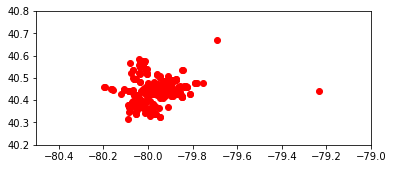

In [36]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
ax.set_xlim(-80.5, -79)
ax.set_ylim(40.2, 40.8)
plt.show()